In [ ]:
!pip install modAL        

In [ ]:
import numpy as np

from modAL.models import ActiveLearner
from modAL.uncertainty import uncertainty_sampling
from modAL.uncertainty import margin_sampling
from modAL.uncertainty import entropy_sampling

from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

import seaborn as sns
import numpy as np 
import pandas as pd 
from statistics import mean 
from sklearn.impute import SimpleImputer 
from sklearn.preprocessing import StandardScaler 

from IPython import display
from matplotlib import pyplot as plt

import keras
from keras.models import Sequential

%matplotlib inline


In [ ]:
dataset=pd.read_csv("datasettest.csv")

X=dataset.iloc[:,3:-1]
X=X.clip(dataset.quantile(0.20), dataset.quantile(0.80), axis=1)
X=X.values
sc = StandardScaler() 
X[:, :-1] = sc.fit_transform(X[:, :-1])       
y=dataset.iloc[:,-1].values


dataset1=pd.read_csv("Dataset1.csv")

X1=dataset1.iloc[:,3:-1]
X1=X1.clip(dataset.quantile(0.20), dataset.quantile(0.80), axis=1)
X1=X1.values
sc = StandardScaler() 
X1[:, :-1] = sc.fit_transform(X1[:, :-1]) 
y1=dataset1.iloc[:,-1].values
X_pool, y_pool=X1,y1
# y_pool


Correlation of features with the reputation score 

id_str               -0.264992
statuses_count        0.141885
followers_count       0.032025
listed_count          0.032473
friends_count         0.296631
has_url               0.179532
mention_by_others     0.312680
retweet_ratio        -0.061576
liked_ratio           0.047517
orig_content_ratio    0.075159
hashtag_ratio        -0.067272
urls_ratio            0.112418
symbols_ratio         0.053212
mentions_ratio       -0.110301
Social_reputation     0.681696
retweet_hindex        0.191152
like_hindex           0.097426
Content_Score        -0.115210
Context_score         0.063717
Reputation_score      0.180006
Classification        1.000000
Name: Classification, dtype: float64


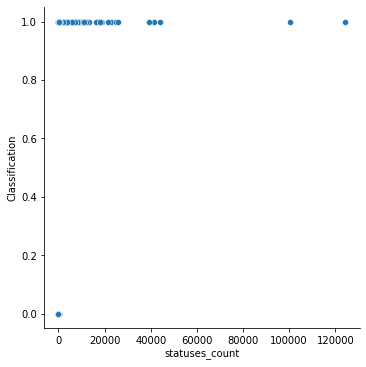

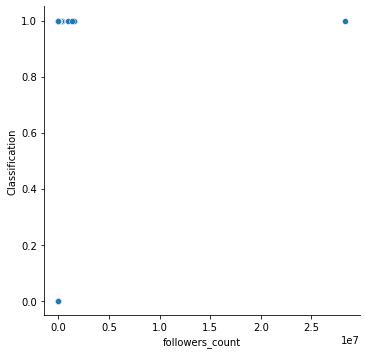

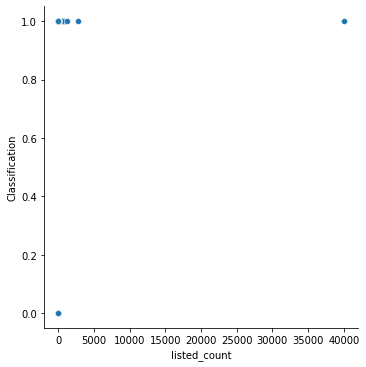

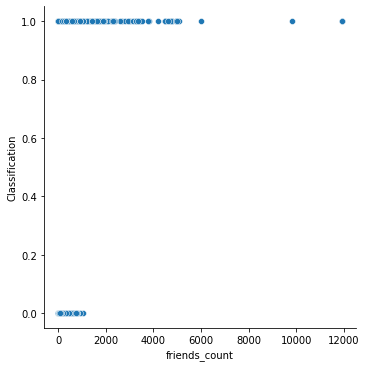

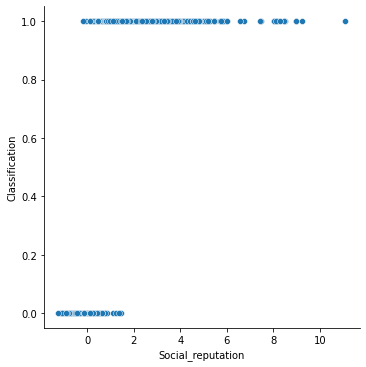

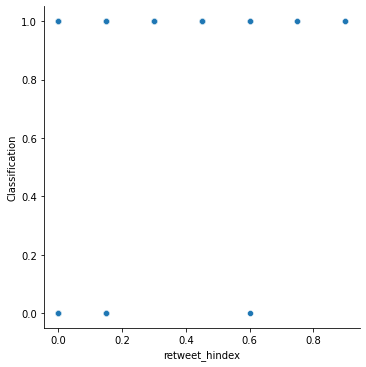

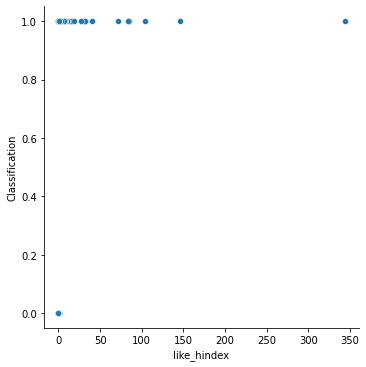

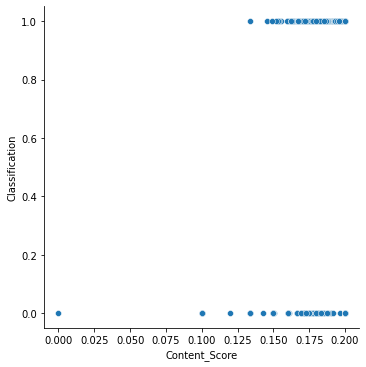

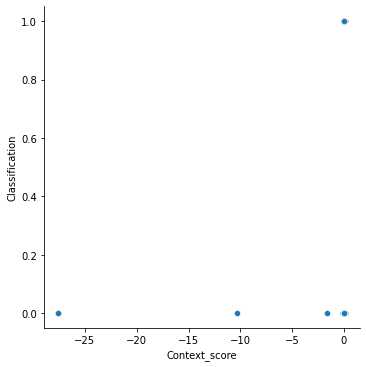

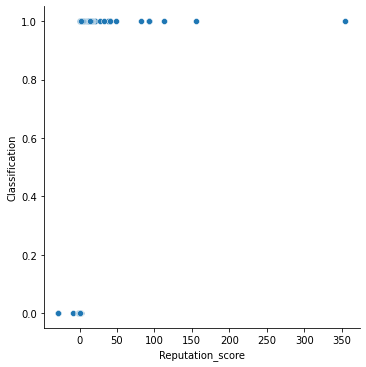

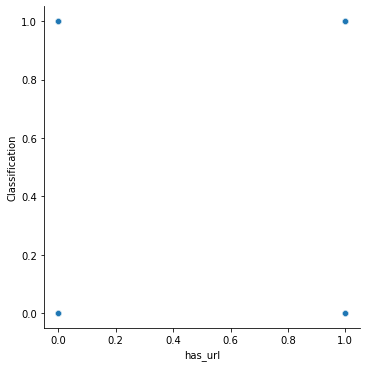

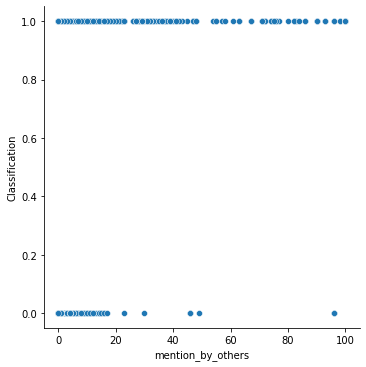

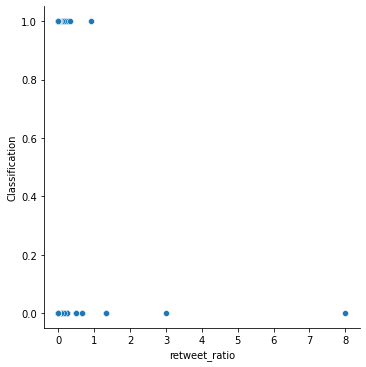

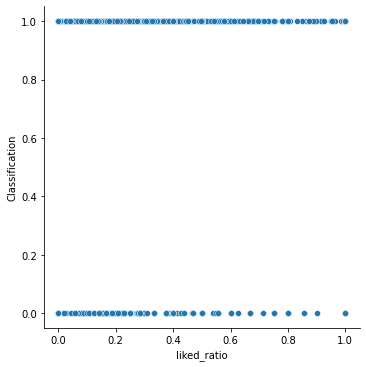

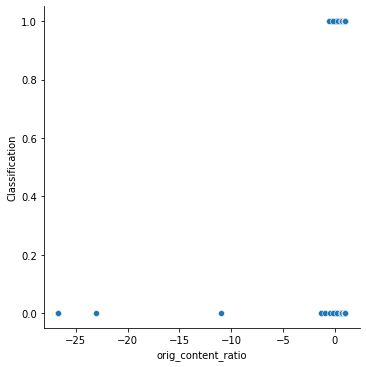

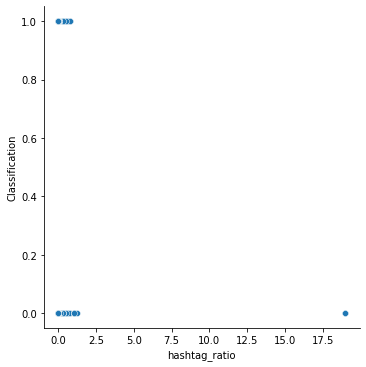

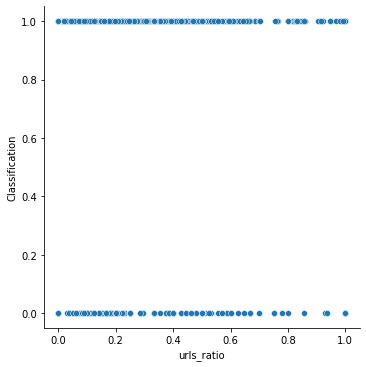

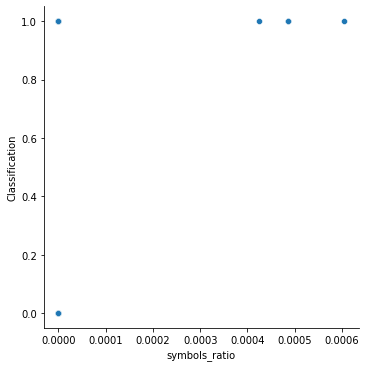

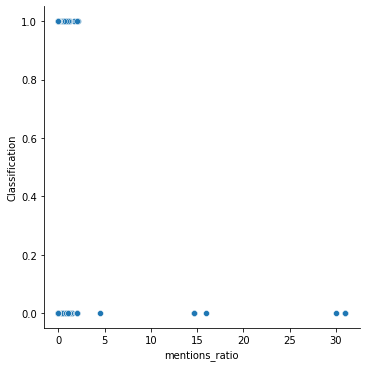

In [ ]:
corr = dataset.corr()

print("Correlation of features with the reputation score \n")
print (corr['Classification'])
features=dataset.iloc[ : ,1:]

sns.relplot(x="statuses_count", y="Classification", data=dataset);
sns.relplot(x="followers_count", y="Classification", data=dataset);
sns.relplot(x="listed_count", y="Classification", data=dataset);
sns.relplot(x="friends_count", y="Classification", data=dataset);
sns.relplot(x="Social_reputation", y="Classification", data=dataset);
sns.relplot(x="retweet_hindex", y="Classification", data=dataset);
sns.relplot(x="like_hindex", y="Classification", data=dataset);
sns.relplot(x="Content_Score", y="Classification", data=dataset);
sns.relplot(x="Context_score", y="Classification", data=dataset);
sns.relplot(x="Reputation_score", y="Classification", data=dataset);
sns.relplot(x="has_url", y="Classification", data=dataset);
sns.relplot(x="mention_by_others", y="Classification", data=dataset);
sns.relplot(x="retweet_ratio", y="Classification", data=dataset);
sns.relplot(x="liked_ratio", y="Classification", data=dataset);
sns.relplot(x="orig_content_ratio", y="Classification", data=dataset);
sns.relplot(x="hashtag_ratio", y="Classification", data=dataset);
sns.relplot(x="urls_ratio", y="Classification", data=dataset);
sns.relplot(x="symbols_ratio", y="Classification", data=dataset);
sns.relplot(x="mentions_ratio", y="Classification", data=dataset);

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
n_initial = 100
initial_idx = np.random.choice(range(len(X_train)), size=n_initial, replace=False)
initial_idx
X_initial, y_initial = X_train[initial_idx], y_train[initial_idx]
print(X_initial)
print('yinitial',y_initial)

[[ 1.71551698  0.          0.41371034 ... -0.08878342  0.39111126
   3.34019061]
 [ 1.71551698  0.          1.5542976  ... -1.67507434  0.6603405
   3.34019061]
 [-0.76235507  0.         -0.46792734 ...  0.73876548 -1.08031753
   0.28555229]
 ...
 [-0.71367389  0.         -0.87599964 ...  0.73876548 -1.20485607
   0.56323963]
 [-0.81103625  0.         -1.01202374 ... -1.0068455  -0.76818775
   1.53039795]
 [-0.81103625  0.         -1.01202374 ... -0.59122383  0.88219667
   1.50476765]]
yinitial [1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 0
 1 1 0 1 0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0
 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 0 1 0 1 1 0 0 0 1 1]


In [ ]:
#  param_grid = [
#         {
#             'activation' : ['identity', 'logistic', 'tanh', 'relu'],
#             'solver' : ['lbfgs', 'sgd', 'adgoogleam'],
#             'hidden_layer_sizes': [
#              (1,),(2,),(3,),(4,),(5,),(6,),(7,),(8,),(9,),(10,),(11,), (12,),(13,),(14,),(15,),(16,),(17,),(18,),(19,),(20,),(21,)
#              ]
#         }
#        ]
#  clf = GridSearchCV(MLPClassifier(alpha=0.0001,learning_rate='constant', 
                      # learning_rate_init=0.001, random_state=0), param_grid, cv=3,
                      #      scoring='accuracy')
clf=MLPClassifier(activation='tanh', alpha=0.01,learning_rate='constant', 
                      learning_rate_init=0.1, random_state=0, verbose=True, max_iter=150, hidden_layer_sizes=(50,), warm_start=False, early_stopping=True)
print("clf",clf)
# X_pool, y_pool = np.delete(X_train, initial_idx, axis=0), np.delete(y_train, initial_idx, axis=0)
learner = ActiveLearner(
    # estimator=RandomForestClassifier(),
    # estimator=SVC(kernel='rbf', probability=True),
    # estimator=LogisticRegression(),
    estimator=clf,
    # query_strategy=uncertainty_sampling,
    # query_strategy=margin_sampling,
    query_strategy=entropy_sampling,
    X_training=X_initial, y_training=y_initial)
# learner

clf MLPClassifier(activation='tanh', alpha=0.01, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=True, epsilon=1e-08,
              hidden_layer_sizes=(50,), learning_rate='constant',
              learning_rate_init=0.1, max_fun=15000, max_iter=150, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=0, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=True, warm_start=False)
Iteration 1, loss = 0.69251885
Validation score: 0.700000
Iteration 2, loss = 0.35565694
Validation score: 0.800000
Iteration 3, loss = 0.22039023
Validation score: 0.900000
Iteration 4, loss = 0.12119901
Validation score: 0.900000
Iteration 5, loss = 0.13661163
Validation score: 0.900000
Iteration 6, loss = 0.12652414
Validation score: 0.900000
Iteration 7, loss = 0.10265364
Validation score: 1.000000
Iteration 8, loss = 0.09619256
Validation score: 1.000000
Iteration 9, loss = 0.08665825

[[-0.77082932  0.         -0.96873444  0.         -0.7061512   0.
  -1.13315231  0.55766748 -0.52402664  1.47394435  0.         -0.64798061
  -0.75716845  0.         -0.97872451 -1.66561734  1.19386045  0.51336352]]


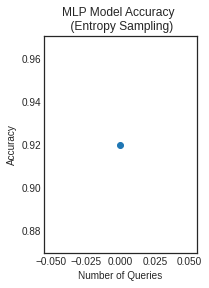

How you classify this user?
0
Iteration 1, loss = 0.70246216
Validation score: 0.692308
Iteration 2, loss = 0.44490507
Validation score: 0.846154
Iteration 3, loss = 0.32477027
Validation score: 0.846154
Iteration 4, loss = 0.22622956
Validation score: 0.846154
Iteration 5, loss = 0.21188837
Validation score: 0.923077
Iteration 6, loss = 0.22014994
Validation score: 0.923077
Iteration 7, loss = 0.20108611
Validation score: 0.846154
Iteration 8, loss = 0.16479719
Validation score: 0.846154
Iteration 9, loss = 0.15905707
Validation score: 0.846154
Iteration 10, loss = 0.15189626
Validation score: 0.846154
Iteration 11, loss = 0.13929200
Validation score: 0.846154
Iteration 12, loss = 0.13332657
Validation score: 0.846154
Iteration 13, loss = 0.12394927
Validation score: 0.846154
Iteration 14, loss = 0.12391182
Validation score: 0.846154
Iteration 15, loss = 0.11626094
Validation score: 0.846154
Iteration 16, loss = 0.10589426
Validation score: 0.846154
Validation score did not improve mo

ValueError: ignored

In [ ]:
from sklearn import metrics
n_queries = 3
accuracy_scores = [learner.score(X_test, y_test)]
for i in range(n_queries):
  display.clear_output(wait=True)
  query_idx, query_inst = learner.query(X_pool)
  query_inst
  with plt.style.context('seaborn-white'):
  #   plt.figure(figsize=(10, 5))
  #   plt.subplot(1, 2, 1)
  #   plt.title('Digit to label')
  #   plt.imshow(query_inst.reshape(8, 8))
    print(query_inst)
    plt.subplot(1, 2, 2)
    plt.title('MLP Model Accuracy \n (Entropy Sampling)')
    plt.plot(range(i+1), accuracy_scores)
    plt.scatter(range(i+1), accuracy_scores)
    plt.xlabel('Number of Queries')
    plt.ylabel('Accuracy')
    display.display(plt.gcf())
    # plt.imsave('123.png')
    plt.savefig("123.png", dpi=(250), bbox_inches='tight')
    plt.close('all')
    


  print("How you classify this user?")
  y_new = np.array([int(input())], dtype=int)
  learner.teach(query_inst, y_new)
  X_pool, y_pool = np.delete(X_pool, query_idx, axis=0), np.delete(y_pool, query_idx, axis=0)
  accuracy_scores.append(learner.score(X_test, y_test))  
  fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
  metrics.auc(fpr, tpr)

In [ ]:
# # build function for the Keras' scikit-learn API
# def create_keras_model():
#     """
#     This function compiles and returns a Keras model.
#     Should be passed to KerasClassifier in the Keras scikit-learn API.
#     """

#     model = Sequential()
#     model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
#     model.add(Conv2D(64, (3, 3), activation='relu'))
#     model.add(MaxPooling2D(pool_size=(2, 2)))
#     model.add(Dropout(0.25))
#     model.add(Flatten())
#     model.add(Dense(128, activation='relu'))
#     model.add(Dropout(0.5))
#     model.add(Dense(10, activation='softmax'))

#     model.compile(loss='categorical_crossentropy', optimizer='adadelta', metrics=['accuracy'])

#     return model

# classifier = KerasClassifier(create_keras_model)